**Identifiers & Metadata**

application_id: A unique identifier for each individual loan application.

customer_id: A unique identifier for each customer. A single customer may have multiple applications.

application_date: The date on which the loan application was submitted.

data_batch_id: An identifier for the data processing batch this record belongs to.

**Loan Characteristics**

loan_amount_requested: The principal amount of the loan requested by the applicant.

loan_amount_usd: The requested loan amount converted to US Dollars for standardization.

loan_tenure_months: The duration of the loan repayment period in months.

interest_rate_offered: The annual interest rate offered for the loan.

purpose_of_loan: The stated reason for seeking the loan.

loan_type_*: A set of binary columns indicating the specific type of loan product.

**Applicant Financial Profile**

employment_status: The applicant's current employment situation.

monthly_income: The applicant's stated gross monthly income.

yearly_income: The applicant's stated gross annual income.

annual_bonus: The applicant's declared annual bonus amount.

cibil_score: A credit score (e.g., from CIBIL) representing the applicant's creditworthiness and history. Higher scores indicate better credit health.

existing_emis_monthly: The total amount of Equated Monthly Installments (EMIs) the applicant is currently paying for other existing loans.

debt_to_income_ratio: This ratio helps assess an applicant's ability to manage monthly payments.

credit_utilization_ratio: The ratio of the applicant's outstanding credit card debt to their total credit card limit.

**Applicant Demographics & Personal Information**

applicant_age: The age of the applicant in years at the time of application.

gender_*: A set of one-hot encoded binary columns representing the applicant's gender.

property_ownership_status: The applicant's housing situation.

residential_address: The applicant's provided residential address (likely anonymized or generalized).

number_of_dependents: The number of people financially dependent on the applicant.

**Target Variable**

fraud_flag: This is the key target variable for prediction. It's a binary indicator where 1 signifies a fraudulent application and 0 signifies a legitimate application.

In [411]:
import pandas as pd
import matplotlib.pyplot as plt

In [396]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,application_id,customer_id,application_date,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,loan_type_Home Loan,loan_type_Personal Loan,gender_Male,gender_Other,yearly_income,loan_amount_usd,credit_utilization_ratio,annual_bonus,data_batch_id,fraud_flag
0,1363,acde818b-d1cc-4da4-9858-c2155ee2be85,CUST102632,2025-02-19,100000.0,60,11.27,Vehicle Purchase,Self-Employed,NaN,...,0,0,0,0,658800.0,108000.0,0.424338,611.79,batch_20250926_A,0
1,45780,75ab4a03-0d02-4ee4-9840-97486f64ec9e,CUST109462,2024-02-09,551000.0,360,12.14,Vehicle Purchase,Retired,47600.0,...,0,1,1,0,571200.0,595080.0,0.387727,300.12,batch_20250926_A,1
2,48716,f1170d68-b793-46e2-835a-2c1d58be9d9d,CUST105157,2025-05-10,440000.0,240,12.26,Business Expansion,Self-Employed,NaN,...,1,0,0,0,1476000.0,475200.0,0.363311,195884.39,batch_20250926_A,0
3,44109,2ccd4175-9bee-464f-b321-22645c778d8e,CUST103892,2024-09-09,1075000.0,12,12.77,Wedding,Business Owner,30000.0,...,0,0,0,0,360000.0,1161000.0,0.743246,9669.89,batch_20250926_A,0
4,13333,645a4f5b-3382-4624-8496-801147ca1bc3,CUST114147,2023-10-14,379000.0,120,10.56,Wedding,Retired,109800.0,...,0,0,0,1,1317600.0,409320.0,0.442568,1646.28,batch_20250926_A,0


In [397]:
df = df.drop(columns=['Unnamed: 0']) ##removing first column, that looks just an random id
df.head()

,application_id,customer_id,application_date,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,...,loan_type_Home Loan,loan_type_Personal Loan,gender_Male,gender_Other,yearly_income,loan_amount_usd,credit_utilization_ratio,annual_bonus,data_batch_id,fraud_flag
0,acde818b-d1cc-4da4-9858-c2155ee2be85,CUST102632,2025-02-19,100000.0,60,11.27,Vehicle Purchase,Self-Employed,NaN,633,...,0,0,0,0,658800.0,108000.0,0.424338,611.79,batch_20250926_A,0
1,75ab4a03-0d02-4ee4-9840-97486f64ec9e,CUST109462,2024-02-09,551000.0,360,12.14,Vehicle Purchase,Retired,47600.0,705,...,0,1,1,0,571200.0,595080.0,0.387727,300.12,batch_20250926_A,1
2,f1170d68-b793-46e2-835a-2c1d58be9d9d,CUST105157,2025-05-10,440000.0,240,12.26,Business Expansion,Self-Employed,NaN,750,...,1,0,0,0,1476000.0,475200.0,0.363311,195884.39,batch_20250926_A,0
3,2ccd4175-9bee-464f-b321-22645c778d8e,CUST103892,2024-09-09,1075000.0,12,12.77,Wedding,Business Owner,30000.0,732,...,0,0,0,0,360000.0,1161000.0,0.743246,9669.89,batch_20250926_A,0
4,645a4f5b-3382-4624-8496-801147ca1bc3,CUST114147,2023-10-14,379000.0,120,10.56,Wedding,Retired,109800.0,711,...,0,0,0,1,1317600.0,409320.0,0.442568,1646.28,batch_20250926_A,0


In [398]:
# keep only distinct rows, removing duplicated ones
df=df.drop_duplicates()
# creates a flag for duplicated 'application_id', that should be unique
df['duplicated_flag'] = df['application_id'].duplicated(keep=False)
# creates a dataframe of only the duplicated loans, with inconsistent data
dfDuplicated=df[df['duplicated_flag']==True]
# removes from the dataframe the duplicated loans, for a consistent analysis
df=df[df['duplicated_flag']==False]
# presents the duplicated loans
dfDuplicated.sort_values('application_id')

,application_id,customer_id,application_date,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,...,loan_type_Personal Loan,gender_Male,gender_Other,yearly_income,loan_amount_usd,credit_utilization_ratio,annual_bonus,data_batch_id,fraud_flag,duplicated_flag
39345,036a9848-124d-4f9b-b2a7-54892951fdad,CUST108692,2025-01-22,743000.0,12,8.26,Medical Emergency,Retired,63300.0,703,...,1,1,0,759600.0,802440.0,0.573369,464.27,batch_20250926_A,1,True
571,036a9848-124d-4f9b-b2a7-54892951fdad,CUST108692,2025-01-22,743000.0,1349,8.26,Medical Emergency,Retired,63300.0,703,...,1,1,0,759600.0,802440.0,0.573369,464.27,batch_20250926_A,1,True
5361,043cebfa-03f7-4ec6-a1f7-72fae1ee6b66,CUST114680,2023-08-16,146000.0,1376,6.20,Medical Emergency,Salaried,32700.0,746,...,0,0,0,392400.0,157680.0,0.754111,2457.73,batch_20250926_A,1,True
29361,043cebfa-03f7-4ec6-a1f7-72fae1ee6b66,CUST114680,2023-08-16,146000.0,12,6.20,Medical Emergency,Salaried,32700.0,746,...,0,0,0,392400.0,157680.0,0.754111,2457.73,batch_20250926_A,1,True
6357,04904486-8385-4a1e-91b3-7b0d369c724c,CUST110972,2023-09-06,696000.0,1225,8.16,Education,Retired,NaN,707,...,0,0,1,1149600.0,751680.0,0.490685,20888.09,batch_20250926_A,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15522,f4066de5-fca5-4cc1-8122-a9ea42dc2360,CUST100606,2023-07-23,756000.0,1284,9.86,Home Renovation,Student,30700.0,768,...,0,0,1,368400.0,816480.0,0.180643,7149.54,batch_20250926_A,1,True
18603,f4c5a5db-0736-40c5-9877-5a022857f345,CUST100018,2023-10-10,186000.0,36,9.59,Business Expansion,Retired,27300.0,750,...,0,0,0,327600.0,200880.0,0.521668,247.13,batch_20250926_A,1,True
13319,f4c5a5db-0736-40c5-9877-5a022857f345,CUST100018,2023-10-10,186000.0,1203,9.59,Business Expansion,Retired,27300.0,750,...,0,0,0,327600.0,200880.0,0.521668,247.13,batch_20250926_A,1,True
11606,f7d45f93-7f30-4aaf-b7e4-3f0e32dc0380,CUST102177,2024-10-16,100000.0,36,9.76,Medical Emergency,Retired,54600.0,708,...,1,0,1,655200.0,108000.0,0.393596,2567.78,batch_20250926_A,1,True


In [399]:
# shape of the cleaned dataframe
df.shape

(40610, 29)

In [400]:
# column types
df.dtypes

application_id                object
customer_id                   object
application_date              object
loan_amount_requested        float64
loan_tenure_months             int64
interest_rate_offered        float64
purpose_of_loan               object
employment_status             object
monthly_income               float64
cibil_score                    int64
existing_emis_monthly        float64
debt_to_income_ratio         float64
property_ownership_status     object
residential_address           object
applicant_age                  int64
number_of_dependents         float64
loan_type_Car Loan             int64
loan_type_Education Loan       int64
loan_type_Home Loan            int64
loan_type_Personal Loan        int64
gender_Male                    int64
gender_Other                   int64
yearly_income                float64
loan_amount_usd              float64
credit_utilization_ratio     float64
annual_bonus                 float64
data_batch_id                 object
f

In [401]:
# describe of numerical data
df.describe()

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents,loan_type_Car Loan,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,gender_Male,gender_Other,yearly_income,loan_amount_usd,credit_utilization_ratio,annual_bonus,fraud_flag
count,4.061000e+04,40610.000000,40610.000000,36539.000000,40610.000000,40610.000000,40610.000000,40610.000000,36500.000000,40610.000000,40610.000000,40610.000000,40610.000000,40610.000000,40610.000000,4.061000e+04,4.061000e+04,40610.000000,4.061000e+04,40610.00000
mean,5.163335e+05,155.897735,10.526045,50767.243220,699.093302,3059.485348,8.549728,43.072347,2.011890,0.199902,0.199483,0.202068,0.200862,0.327185,0.338488,6.091322e+05,5.552586e+05,0.498377,9.429470e+03,0.12982
std,3.535959e+05,235.444498,1.991861,23807.958498,50.159035,1894.772039,9.557776,12.971605,1.406042,0.399931,0.399617,0.401548,0.400650,0.469191,0.473201,2.855213e+05,2.975882e+05,0.197558,2.739620e+04,0.33611
min,1.000000e+05,12.000000,5.270000,10000.000000,484.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+05,1.080000e+05,0.000000,3.210000e+00,0.00000
25%,3.000000e+05,24.000000,9.110000,33600.000000,665.000000,1700.000000,3.070000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.032000e+05,3.240000e+05,0.362759,1.070925e+03,0.00000
50%,5.030000e+05,60.000000,10.500000,50200.000000,699.000000,3000.000000,5.940000,43.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.036000e+05,5.432400e+05,0.498143,2.984840e+03,0.00000
75%,7.010000e+05,240.000000,11.890000,67200.000000,733.000000,4400.000000,10.290000,54.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.064000e+05,7.570800e+05,0.630227,8.269100e+03,0.00000
max,2.775000e+07,1499.000000,18.230000,162000.000000,889.000000,11400.000000,102.000000,65.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.944000e+06,1.747440e+06,1.000000,1.853496e+06,1.00000


In [402]:
# describe of categorial data
df.describe(include='object')

,application_id,customer_id,application_date,purpose_of_loan,employment_status,property_ownership_status,residential_address,data_batch_id
count,40610,40610,40610,40610,40610,40610,40610,40610
unique,40610,17335,1096,7,6,6,17335,1
top,acde818b-d1cc-4da4-9858-c2155ee2be85,CUST118934,2024-05-26,Wedding,Salaried,Rented,"H.No. 971, Mani Zila, Jabalpur 537743, Bikaner...",batch_20250926_A
freq,1,9,61,5862,6940,9615,9,40610


In [ ]:
# nulls proportion
dfNulls = df.isnull().sum()
dfNulls[dfNulls > 0]/df.shape[0] * 100

monthly_income          10.024624
number_of_dependents    10.120660
dtype: float64

In [406]:
df.columns

Index(['application_id', 'customer_id', 'application_date',
       'loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered',
       'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score',
       'existing_emis_monthly', 'debt_to_income_ratio',
       'property_ownership_status', 'residential_address', 'applicant_age',
       'number_of_dependents', 'loan_type_Car Loan',
       'loan_type_Education Loan', 'loan_type_Home Loan',
       'loan_type_Personal Loan', 'gender_Male', 'gender_Other',
       'yearly_income', 'loan_amount_usd', 'credit_utilization_ratio',
       'annual_bonus', 'data_batch_id', 'fraud_flag', 'duplicated_flag'],
      dtype='object')

### Univariate

#### Application Analysis

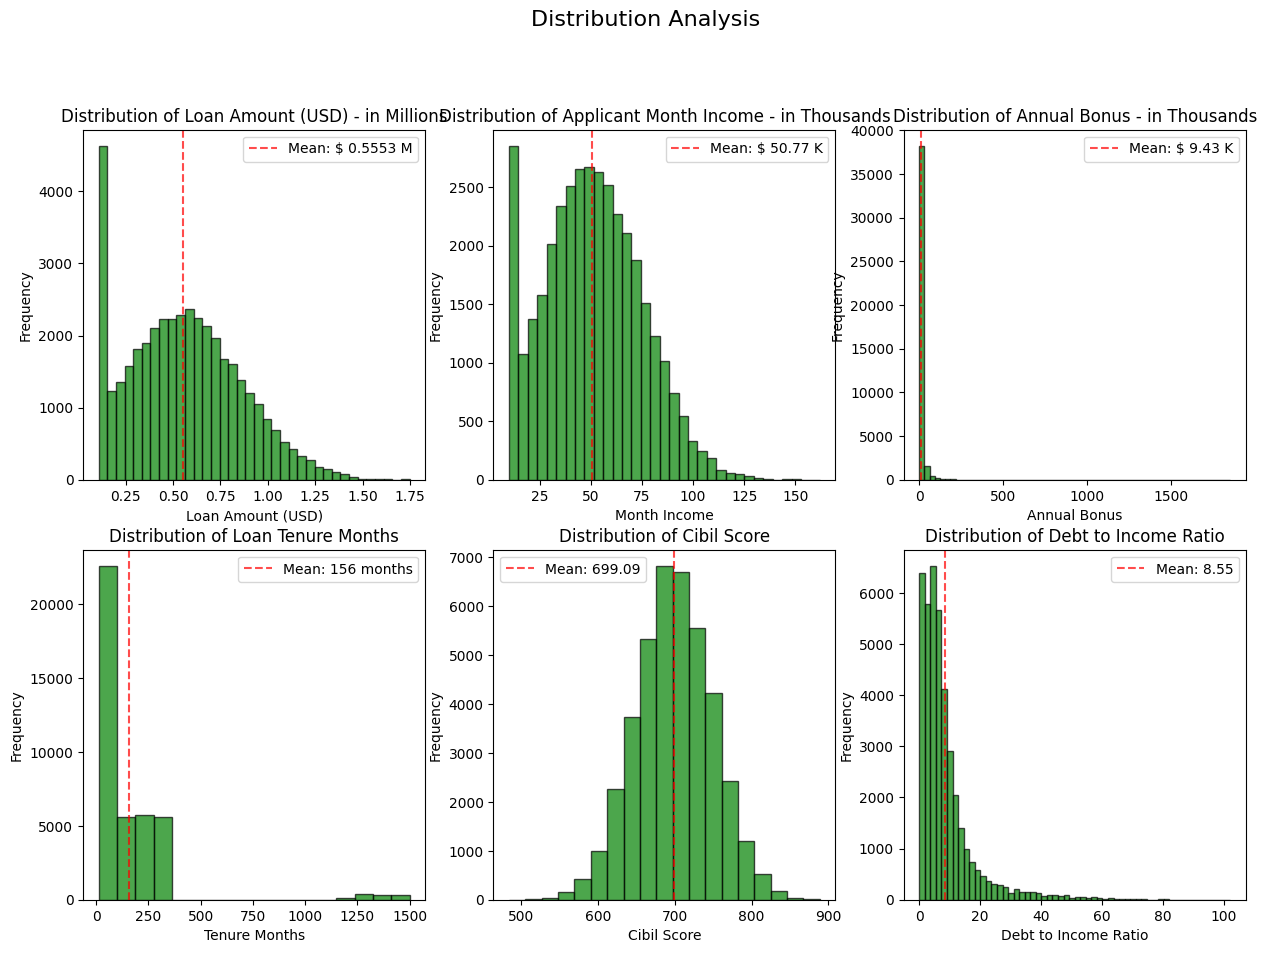

In [488]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Analysis', fontsize=16, y=1.0)

# loan amount (usd) distribution
yFeature = df['loan_amount_usd']/1000000
nBins = round(yFeature.nunique()**0.5)
yMean = round(yFeature.mean(), 4)

axes[0,0].hist(yFeature, bins=nBins, alpha=0.7, color='green', edgecolor='black')
axes[0,0].set_title('Distribution of Loan Amount (USD) - in Millions')
axes[0,0].set_xlabel('Loan Amount (USD)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(yMean, color='red', linestyle='--', alpha=0.7, label=f'Mean: $ {yMean} M')
axes[0,0].legend()

# monthly income distribution
yFeature = df['monthly_income']/1000
nBins = round(yFeature.nunique()**0.5)
yMean = round(yFeature.mean(), 2)

axes[0,1].hist(yFeature, bins=nBins, alpha=0.7, color='green', edgecolor='black')
axes[0,1].set_title('Distribution of Applicant Month Income - in Thousands')
axes[0,1].set_xlabel('Month Income')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(yMean, color='red', linestyle='--', alpha=0.7, label=f'Mean: $ {yMean} K')
axes[0,1].legend()

# annual bonus distribution
yFeature = df['annual_bonus']/1000
nBins = 50 # the square root was not well representing the distribution
yMean = round(yFeature.mean(), 2)

axes[0,2].hist(yFeature, bins=60, alpha=0.7, color='green', edgecolor='black')
axes[0,2].set_title('Distribution of Annual Bonus - in Thousands')
axes[0,2].set_xlabel('Annual Bonus')
axes[0,2].set_ylabel('Frequency')
axes[0,2].axvline(yMean, color='red', linestyle='--', alpha=0.7, label=f'Mean: $ {yMean} K')
axes[0,2].legend()

# loan tenure months distribution
yFeature = df['loan_tenure_months']
nBins = round(yFeature.nunique()**0.5)
yMean = round(yFeature.mean())

axes[1,0].hist(yFeature, bins=nBins, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_title('Distribution of Loan Tenure Months')
axes[1,0].set_xlabel('Tenure Months')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(yMean, color='red', linestyle='--', alpha=0.7, label=f'Mean: {yMean} months')
axes[1,0].legend()

# cibil score distribution
yFeature = df['cibil_score']
nBins = round(yFeature.nunique()**0.5)
yMean = round(yFeature.mean(), 2)

axes[1,1].hist(yFeature, bins=nBins, alpha=0.7, color='green', edgecolor='black')
axes[1,1].set_title('Distribution of Cibil Score')
axes[1,1].set_xlabel('Cibil Score')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(yMean, color='red', linestyle='--', alpha=0.7, label=f'Mean: {yMean}')
axes[1,1].legend()

# debt to income ratio distribution
yFeature = df['debt_to_income_ratio']
nBins = round(yFeature.nunique()**0.5)
yMean = round(yFeature.mean(), 2)

axes[1,2].hist(yFeature, bins=nBins, alpha=0.7, color='green', edgecolor='black')
axes[1,2].set_title('Distribution of Debt to Income Ratio')
axes[1,2].set_xlabel('Debt to Income Ratio')
axes[1,2].set_ylabel('Frequency')
axes[1,2].axvline(yMean, color='red', linestyle='--', alpha=0.7, label=f'Mean: {yMean}')
axes[1,2].legend()